In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"scripts"))
import numpy as np
import matplotlib.pyplot as plt
import copy
import torch
import pandas as pd

# import scripts
from scripts.exp_plotter import exp_plotter
from scripts.metric import metric

dtype = torch.float

In [2]:
portfolio_num = 0

In [3]:
acqs = [f"portfolio_{portfolio_num} tuning_method"]

In [4]:
data = exp_plotter.display_portfolio(folder_name = "experiment2", file_name = "all_portfolios", number = portfolio_num)
starting_portfolio = data[0]

not saving unless provide a file_name


##### results

In [5]:
res = exp_plotter.gp_evaluation(folder_name = "experiment1", file_name = f"portfolio {portfolio_num}, gp_evaluation_results")
res = sorted(res, key=lambda x:x[-1],reverse = True)[:]
print("")
print("top 5 choice:")
res

according to log marginal likelihood, the best gp is:

('RQ', 'pro', 'ADAM', 0.0007945461741959056, 2.656761964162191)

top 5 choice:


[('RQ', 'pro', 'ADAM', 0.0007945461741959056, 2.656761964162191),
 ('SE', 'pro', 'ADAM', 0.0010162353864870965, 2.5364089806874595),
 ('RQ', 'pro', 'quasi_newton', 0.0008670977937678496, 2.5216101805369058),
 ('MA2.5', 'raw', 'ADAM', 0.001090099123151352, 2.4997963110605874),
 ('SE', 'raw', 'ADAM', 0.0013553214957937598, 2.4992894331614175),
 ('MA2.5', 'pro', 'ADAM', 0.0009419579097690681, 2.478545904159546),
 ('MA2.5', 'pro', 'quasi_newton', 0.0009576119288491706, 2.4769763151804605),
 ('PO3', 'raw', 'ADAM', 0.001108320274700721, 2.45784322420756),
 ('PO3', 'raw', 'quasi_newton', 0.0011059573929135997, 2.450944423675537),
 ('RQ', 'raw', 'ADAM', 0.000991327998538812, 2.42362904548645),
 ('SE', 'pro', 'quasi_newton', 0.0010379984936056037, 2.4006426334381104),
 ('SE', 'raw', 'quasi_newton', 0.0010380825066628556, 2.4005885124206543),
 ('RQ', 'raw', 'quasi_newton', 0.0010386412225974102, 2.397663116455078),
 ('MA2.5', 'raw', 'quasi_newton', 0.0010586859813580911, 2.337787310282389),
 ('P

In [6]:
res = exp_plotter.acq_func_portfolio(folder_name = "experiment2", file_names = acqs)
print("")
print("all acquisition functions", list(res.keys()))

best acquisition function: ADAM UCB_1
best drop %: 1.892%
starting margin $211,021,104
lowest margin $207,028,534
saving margin $3,992,571

all acquisition functions ['ADAM UCB_1', 'quasi_newton UCB_1']


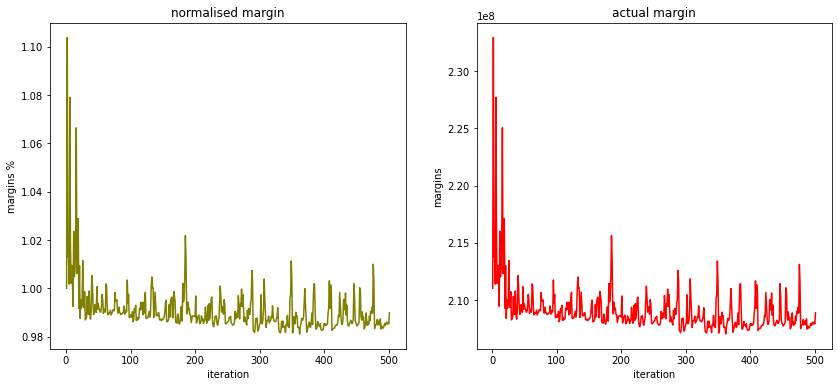

In [7]:
exp_plotter.convergent_plot(res, acq_func_name = "ADAM UCB_1", turning_point=70, y_axis_lim=None)

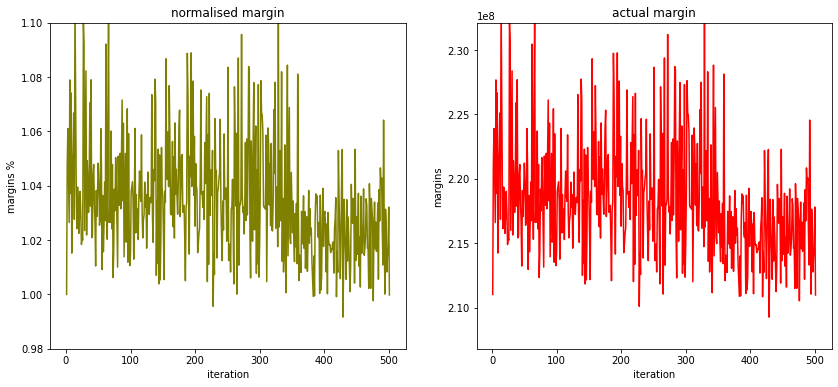

In [8]:
exp_plotter.convergent_plot(res, acq_func_name = "quasi_newton UCB_1", turning_point=70, y_axis_lim=[0.98,1.10])

In [9]:
y1= res["ADAM UCB_1"][1][0].flatten()
y2= res["quasi_newton UCB_1"][1][0].flatten()

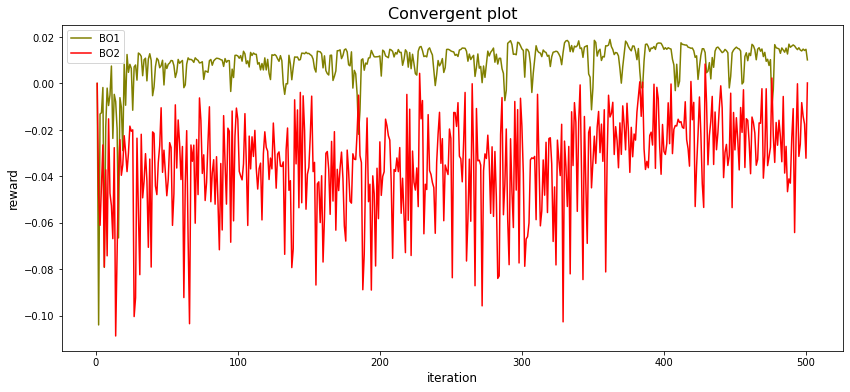

In [14]:
_, ax = plt.subplots(nrows =1 , ncols = 1, figsize=(14,6))
ax1 = ax

ax1.set_title("Convergent plot", fontsize =16)
ax1.plot([i+1 for i in range(len(y1))], [1+i for i in y1], color = "olive", label = "BO1")
ax1.plot([i+1 for i in range(len(y1))], [1+i for i in y2], color = "red", label = "BO2")

ax1.set_xlabel("iteration", fontsize=12)
ax1.set_ylabel("reward", fontsize=12)
plt.legend()